In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Preprocessing

In [117]:
df = pd.read_csv("../data/diabetes.csv")

In [118]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [119]:
df.shape

(768, 9)

In [120]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### at map To show correlation between the data 

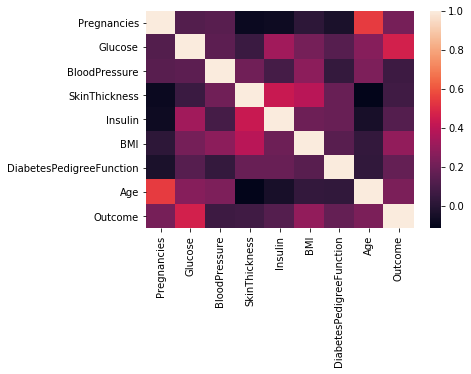

In [122]:
sns.heatmap(df.corr())

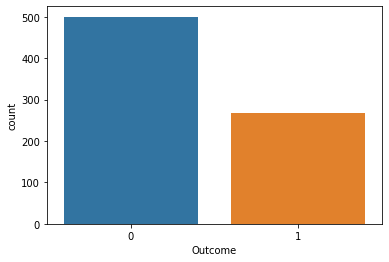

In [123]:
sns.countplot(df['Outcome'])

In [124]:
features = [df.columns]
features

[Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
       dtype='object')]

#### Analyse Outliers of the data

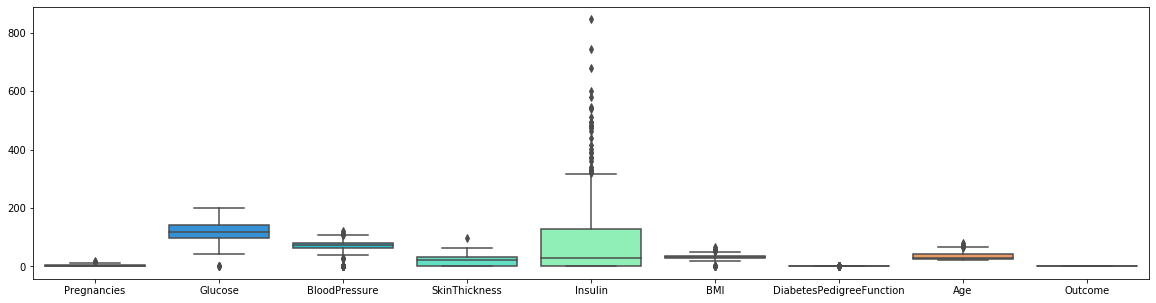

In [125]:
plt.figure(figsize=(20,5))
sns.boxplot(data =df, orient='v', palette='rainbow')

#### Fill Null Values

In [126]:
index_s = df[df['SkinThickness'] == 0].index.values

In [127]:
for i in index_s:
    df['SkinThickness'][i] = df['SkinThickness'].mean()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
index_I = df[df['Insulin'] == 0].index.values
for i in index_I:
    df['Insulin'][i] = df['Insulin'].mean()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
index_g = df[df['Glucose'] == 0].index.values
for i in index_g:
    df['Glucose'][i] = df['Glucose'].mean()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
index_b = df[df['BloodPressure'] == 0].index.values
for i in index_b:
    df['BloodPressure'][i] = df['BloodPressure'].mean()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
index_bmi = df[df['BMI'] == 0].index.values
for i in index_bmi:
    df['BMI'][i] = df['BMI'].mean()

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
index_d = df[df['Pregnancies'] == 0].index.values
len(index_d)
#for i in index_I:
#    df['Insulin'][i] = df['Insulin'].mean()

111

#### Scale data for Classification

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
scaler = StandardScaler()

In [135]:
scaler.fit(df.drop('Outcome', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
scaled_features = scaler.transform(df.drop('Outcome', axis = 1))

In [137]:
scaled_data = pd.DataFrame(scaled_features, columns = df.columns[ : -1])

In [138]:
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865295,-0.025183,0.819570,-0.563672,0.166823,0.468492,1.425995
1,-0.844885,-1.205968,-0.521095,0.170896,-0.563672,-0.851987,-0.365061,-0.190672
2,1.233880,2.015997,-0.686399,-0.802114,-0.552514,-1.332284,0.604397,-0.105584
3,-0.844885,-1.074459,-0.521095,-0.477777,-0.396309,-0.633671,-0.920763,-1.041549
4,-1.141852,0.503646,-2.670048,0.819570,0.429346,1.549494,5.484909,-0.020496


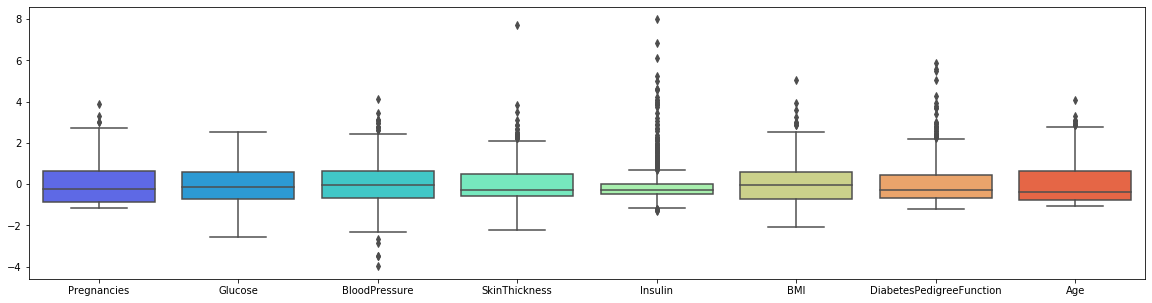

In [139]:
plt.figure(figsize=(20,5))
sns.boxplot(data = scaled_data, orient='v', palette='rainbow')

In [140]:
scaled_data['Insulin'].describe()

count    7.680000e+02
mean     5.503455e-17
std      1.000652e+00
min     -1.288909e+00
25%     -4.744116e-01
50%     -2.624191e-01
75%     -5.796669e-03
max      7.994130e+00
Name: Insulin, dtype: float64

#### Change Outlier Values From Scaled data

In [141]:
feature_data = scaled_data.columns

In [142]:
for i in feature_data:
    q1 = scaled_data[i].describe()['25%']
    q3 = scaled_data[i].describe()['75%']
    IQR = q3 - q1
    high = q3 + (1.5*IQR)
    out_data_1 = scaled_data[scaled_data[i] > high]
    idx_1 = out_data_1.index.values
    
    for j in idx_1:
        scaled_data[i].iloc[j] = high
    
    low = q3 - (1.5*IQR)
    out_data_2 = scaled_data[scaled_data[i] < low]
    idx_2 = out_data_2.index.values
    
    for k in idx_2:
        scaled_data[i].iloc[k] = low

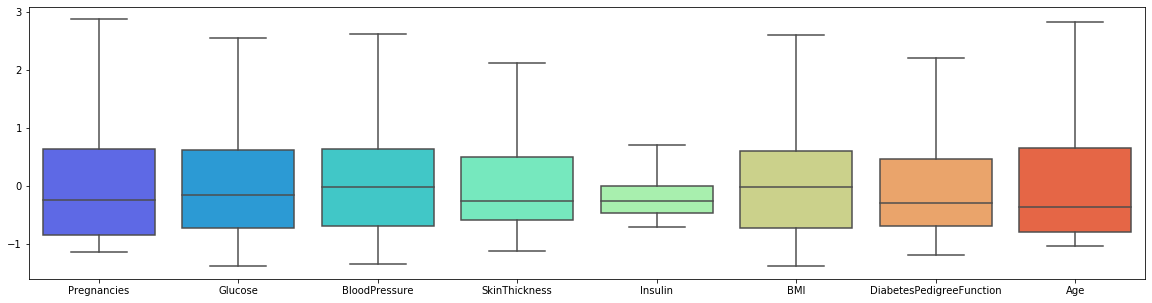

In [143]:
plt.figure(figsize=(20,5))
sns.boxplot(data = scaled_data, orient='v', palette='rainbow')

# Buid Model

## 1) KNN Model

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Outcome'], test_size = 0.3)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [147]:
predict = knn.predict(X_test)

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

In [149]:
print(confusion_matrix(y_test, predict))

[[131  31]
 [ 22  47]]


In [150]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       162
           1       0.60      0.68      0.64        69

    accuracy                           0.77       231
   macro avg       0.73      0.74      0.74       231
weighted avg       0.78      0.77      0.77       231



#### For Better Prediction Decide k value

In [153]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prad_i = knn.predict(X_test)
    error_rate.append(np.mean(prad_i != y_test))

In [154]:
error_rate.index(min(error_rate)) + 1

35

Text(0, 0.5, 'Error Rate')

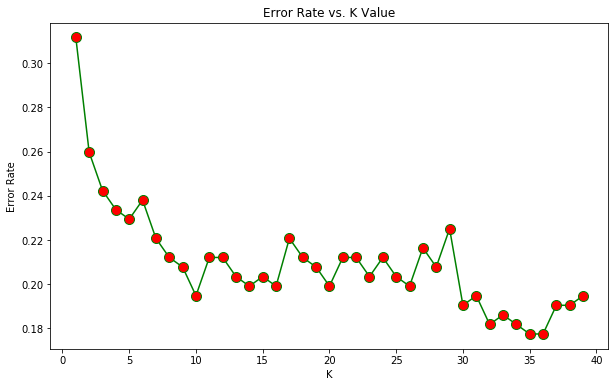

In [155]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,'g-', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [156]:
knn_accurate = KNeighborsClassifier(n_neighbors = 35)
knn_accurate.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [157]:
predict_accurate = knn.predict(X_test)

In [158]:
print(confusion_matrix(y_test, predict_accurate))

[[141  21]
 [ 24  45]]


In [159]:
print(classification_report(y_test, predict_accurate))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       162
           1       0.68      0.65      0.67        69

    accuracy                           0.81       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.80      0.81      0.80       231



In [160]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predict_accurate)
acc

0.8051948051948052

In [171]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
knn_pred_train = knn_accurate.predict_proba(X_train)
print('knn_train roc-auc: {}'.format(roc_auc_score(y_train, knn_pred_train[:,1])))
knn_pred_test = knn_accurate.predict_proba(X_test)
print('knn_test roc-auc: {}'.format(roc_auc_score(y_test, knn_pred_test[:,1])))

knn_train roc-auc: 0.837151735006393
knn_test roc-auc: 0.8682680264805869


In [172]:
knn_final_pred = knn_accurate.predict_proba(X_test)[:, 1]

In [173]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_final_pred)

In [174]:
from sklearn.metrics import accuracy_score
knn_accuracy = []
for thres in thresholds_knn:
    knn_y_pred = np.where(knn_final_pred > thres, 1, 0)
    knn_accuracy.append(accuracy_score(y_test, knn_y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds_knn), pd.Series(knn_accuracy)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
11,0.542857,0.835498
10,0.571429,0.822511
13,0.485714,0.822511
12,0.514286,0.822511
9,0.600000,0.805195


In [175]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()

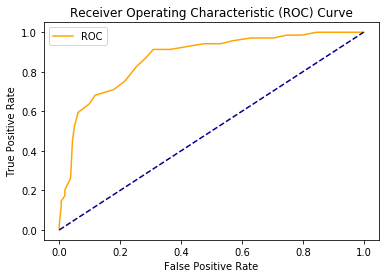

In [176]:
plot_roc_curve(fpr_knn, tpr_knn)

## 2) Logistic Regression

In [177]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
pred = log_classifier.predict(X_test)

In [179]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       162
           1       0.71      0.72      0.72        69

    accuracy                           0.83       231
   macro avg       0.80      0.80      0.80       231
weighted avg       0.83      0.83      0.83       231



In [180]:
log_pred_train = log_classifier.predict_proba(X_train)
print('log train roc-auc: {}'.format(roc_auc_score(y_train, log_pred_train[:,1])))
log_pred_test = log_classifier.predict_proba(X_test)
print('log test roc-auc: {}'.format(roc_auc_score(y_test, log_pred_test[:,1])))

log train roc-auc: 0.829829621480182
log test roc-auc: 0.878511361603149


In [181]:
log_final_pred = log_classifier.predict_proba(X_test)[:, 1]

In [182]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log_final_pred)

In [183]:
from sklearn.metrics import accuracy_score
accuracy_log = []
for thres in thresholds_log:
    log_y_pred = np.where(log_final_pred > thres, 1, 0)
    accuracy_log.append(accuracy_score(y_test, log_y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds_log), pd.Series(accuracy_log)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.512777,0.831169
28,0.527512,0.826840
30,0.500250,0.826840
23,0.618958,0.818182
27,0.553781,0.818182


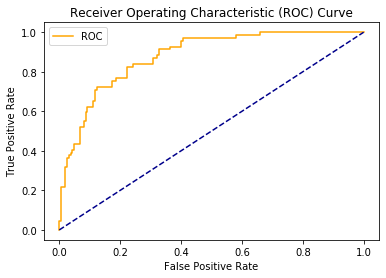

In [184]:
plot_roc_curve(fpr_log, tpr_log)

## 3) Random Forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, rf_train_pred[:,1])))
rf_test_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, rf_test_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.8732778672392199


In [186]:
final_pred_rf = rf_model.predict_proba(X_test)[:, 1]

In [188]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, final_pred_rf)

In [189]:
rf_accuracy_ls = []
for thres in thresholds_rf:
    y_pred_rf = np.where(final_pred_rf > thres, 1, 0)
    rf_accuracy_ls.append(accuracy_score(y_test, y_pred_rf, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds_rf), pd.Series(rf_accuracy_ls)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
18,0.64,0.818182
22,0.60,0.818182
23,0.59,0.818182
30,0.52,0.818182
24,0.58,0.813853


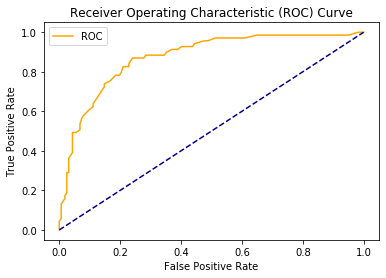

In [190]:
plot_roc_curve(fpr_rf, tpr_rf)

# Analysis Logistic and Random Forest and KNN ROC

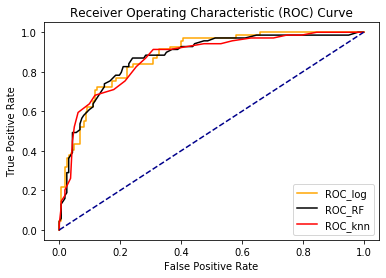

In [191]:
plt.plot(fpr_log, tpr_log, color='orange', label='ROC_log')
plt.plot(fpr_rf, tpr_rf, color='black', label='ROC_RF')
plt.plot(fpr_knn, tpr_knn, color='red', label='ROC_knn')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()